# Task 5: Feature Engineering & Imporvement

In [34]:
# importing required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
# loading the dataset
df = pd.read_csv('../data/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


- #### Create new features that might improve model performance.

In [37]:
# Creating the CRIM_LSTAT_RATIO feature
df['CRIM_LSTAT_RATIO'] = df['crim'] / df['lstat']

From the heatmap in EDA, it was found that lstat had the highly neagtive correlation with medv. crim also has a moderately negative coorelation with medv. But coincidenly, lstat and crim have moderatley positive corelation. 

The new feature CRIM_LSTAT_RATIO is a crime to status ratio that measures the ratio of crime rate to the percentage of lower status population. It might help us capture how crime and socio-economic status interact in affecting the hosuing prices. 


In [43]:
# Defining features and target variable
X = df.drop('medv', axis=1)
y = df['medv']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the model with the new feature
model_with_feature = LinearRegression()
model_with_feature.fit(X_train, y_train)


LinearRegression()

In [44]:
# Predicting on the test set
y_pred_with_feature = model_with_feature.predict(X_test)

# Evaluating the model performance with the new feature
mse_with_feature = mean_squared_error(y_test, y_pred_with_feature)
r2_with_feature = r2_score(y_test, y_pred_with_feature)

print(f"Mean Squared Error with CRIM_LSTAT_RATIO: {mse_with_feature}")
print(f"R² Score with CRIM_LSTAT_RATIO: {r2_with_feature}")

Mean Squared Error with CRIM_LSTAT_RATIO: 27.64162760921062
R² Score with CRIM_LSTAT_RATIO: 0.6230710265038386


In [41]:
# for comparitive evaluation without the new feature
X_baseline = df.drop(['medv', 'CRIM_LSTAT_RATIO'], axis=1)
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X_baseline, y, test_size=0.2, random_state=42)

model_baseline = LinearRegression()
model_baseline.fit(X_train_baseline, y_train_baseline)

y_pred_baseline = model_baseline.predict(X_test_baseline)
mse_baseline = mean_squared_error(y_test_baseline, y_pred_baseline)
r2_baseline = r2_score(y_test_baseline, y_pred_baseline)

print(f"Baseline Mean Squared Error: {mse_baseline}")
print(f"Baseline R² Score: {r2_baseline}")

Baseline Mean Squared Error: 24.291119474973613
Baseline R² Score: 0.6687594935356307


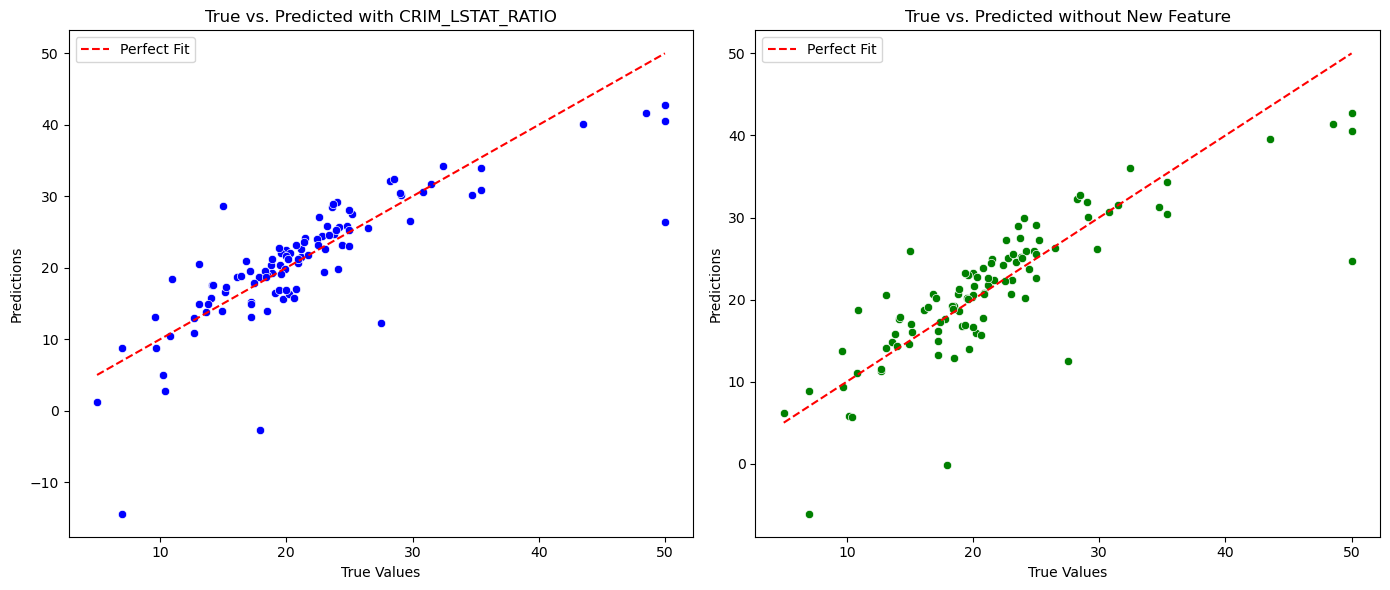

In [42]:
# For plotting
plot_df_with_feature = pd.DataFrame({
    'True Values': y_test,
    'Predictions': y_pred_with_feature
})

plot_df_baseline = pd.DataFrame({
    'True Values': y_test_baseline,
    'Predictions': y_pred_baseline
})

# Plot True vs. Predicted values with the new feature
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='True Values', y='Predictions', data=plot_df_with_feature, color='blue')
plt.plot([plot_df_with_feature['True Values'].min(), plot_df_with_feature['True Values'].max()], 
         [plot_df_with_feature['True Values'].min(), plot_df_with_feature['True Values'].max()], 
         color='red', linestyle='--', label='Perfect Fit')
plt.title('True vs. Predicted with CRIM_LSTAT_RATIO')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()

# Plot True vs. Predicted values without the new feature
plt.subplot(1, 2, 2)
sns.scatterplot(x='True Values', y='Predictions', data=plot_df_baseline, color='green')
plt.plot([plot_df_baseline['True Values'].min(), plot_df_baseline['True Values'].max()], 
         [plot_df_baseline['True Values'].min(), plot_df_baseline['True Values'].max()], 
         color='red', linestyle='--', label='Perfect Fit')
plt.title('True vs. Predicted without New Feature')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()

plt.tight_layout()
plt.show()

The plotting comparision shows that after the addition of new feature to the dataset, the prediction has come closer to the perfect fit. Thus, signifying a slight improvement in the model.S

